## Exploratívna analýza dát o pedagógoch a absolventoch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df_graduates = pd.read_csv('../preprocessing/data_cvtisr_preprocessed/cvtisr_graduates.csv', sep=';')
df_teachers_summary = pd.read_csv('../preprocessing/data_cvtisr_preprocessed/cvtisr_teachers_summary.csv', sep=';')
df_teachers_degrees = pd.read_csv('../preprocessing/data_cvtisr_preprocessed/cvtisr_teachers_data_degrees.csv', sep=';')

## Počty full-time zamestnancov:

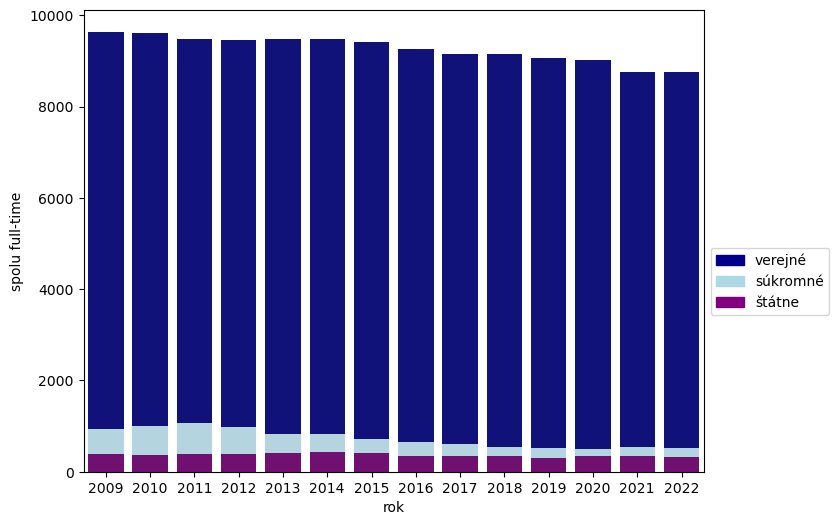

In [3]:
df = df_teachers_summary[['typ', 'rok', 'spolu full-time']].groupby(by=['rok', 'typ']).sum('spolu full-time').reset_index()

# set the figure size
plt.figure(figsize=(8, 6))

# top bar -> sum all values to find y position of the bars
total = df.groupby('rok')['spolu full-time'].sum().reset_index()

bar1 = sns.barplot(x="rok",  y="spolu full-time", data=df[df['typ'] == 'verejná'], color='darkblue')
bar2 = sns.barplot(x="rok", y="spolu full-time", data=df[df['typ'] == 'súkromná'], estimator=sum, errorbar=None,  color='lightblue')
bar2 = sns.barplot(x="rok", y="spolu full-time", data=df[df['typ'] == 'štátna'], estimator=sum, errorbar=None,  color='purple')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='verejné')
bottom_bar = mpatches.Patch(color='purple', label='štátne')
middle_bar = mpatches.Patch(color='lightblue', label='súkromné')
plt.legend(handles=[top_bar, middle_bar, bottom_bar], bbox_to_anchor=(1, 0.5))

# show the graph
plt.show()

## Kontrola univerzit

- skúsme vypísať zoznam všetkých univerzít:

In [4]:
set(df_graduates['univerzita']) == set(df_teachers_summary['univerzita']) == set(df_teachers_degrees['univerzita'])

True

In [5]:
print(sorted(set(df_graduates['univerzita'])))

['AKADÉMIA MÉDIÍ', 'AKADÉMIA OZBROJ.SÍL', 'AKADÉMIA POLIC.ZBORU', 'AKADÉMIA UMENÍ', 'BRATISLAVSKÁ MEDZ.ŠKOLA', 'BRATISLAVSKÁ VŠ PRÁVA', 'DUBNICKÝ TECHN.INŚTITÚT', 'EKONOMICKÁ UNIVERZITA', 'HUDOBNÁ A UMELECKÁ AKAD', 'KATOLÍCKA UNIVERZITA', 'PANEURÓPSKA VŠ', 'PREŠOVSKÁ UNIVERZITA', 'SLOV. POĽNOHOSP. UNIV.', 'SLOV.TECHN. UNIVERZITA', 'SLOV.ZDRAVOTNÍCKA UNIV.', 'STREDOEURÓPSKA VŠ', 'TECH. UNIVERZITA KOŠICE', 'TECH. UNIVERZITA ZVOLEN', 'TRENČ. UNIV. A.DUBČEKA', 'TRENČIANSKA UNIVERZITA', 'TRNAVSKÁ UNIVERZITA', 'UNIV.sv.CYRILA a METODA', 'UNIVER. KONŠT. FILOZOFA', 'UNIVERZITA J.SELYEHO', 'UNIVERZITA KOMENSKÉHO', 'UNIVERZITA MATEJA BELA', 'UNIVERZITA P.J.ŠAFÁRIKA', 'UNIVERZITA VETERIN.LEK.', 'Vysoká škola DTI', 'VŠ BEZPEČN. MANAŽÉRSTVA', 'VŠ DANUBIUS', 'VŠ EKON. a MANAŽMENTU', 'VŠ GOETHE UNI', 'VŠ MANAŽMENTU', 'VŠ MEDZIN.PODNIKANIA', 'VŠ MÚZICKÝCH UMENÍ', 'VŠ V SLÁDKOVIČOVE', 'VŠ VÝTVARNÝCH UMENÍ', 'VŠZaSP sv.ALŽBETY', 'ŽILINSKÁ UNIVERZITA']


In [6]:
df_graduates[df_graduates['univerzita'] == 'DUBNICKÝ TECHN.INŚTITÚT']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
121,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2009,0,845,0,0,0
251,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2010,0,1067,0,0,0
384,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2011,0,1296,0,0,0
518,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2012,0,1537,0,0,0
651,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2013,13,2037,0,0,0
787,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2014,48,1508,0,0,0
926,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2015,81,1277,0,0,0
1064,DUBNICKÝ TECHN.INŚTITÚT,Elektrotechnická fak.,súkromná,2016,115,848,0,0,0


In [7]:
df_graduates[df_graduates['univerzita'] == 'Vysoká škola DTI']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
1199,Vysoká škola DTI,Elektrotechnická fak.,súkromná,2017,47,475,0,0,0
1334,Vysoká škola DTI,Elektrotechnická fak.,súkromná,2018,75,637,0,0,0
1470,Vysoká škola DTI,Elektrotechnická fak.,súkromná,2019,89,522,0,0,0
1605,Vysoká škola DTI,Elektrotechnická fak.,súkromná,2020,24,585,0,0,0
1740,Vysoká škola DTI,Elektrotechnická fak.,súkromná,2021,142,530,0,0,0


**t.j., zjavne od roku 2017 uz namiesto 'DUBNICKÝ TECHN.INŚTITÚT' pouzvaju 'Vysoká škola DTI'**

In [8]:
df_graduates[df_graduates['univerzita'] == 'AKADÉMIA MÉDIÍ']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
776,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2014,14,0,0,0,0
915,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2015,45,0,0,0,0
1053,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2016,54,0,0,0,0


In [9]:
df_teachers_summary[df_teachers_summary['univerzita'] == 'AKADÉMIA MÉDIÍ']

,univerzita,fakulta,typ,rok,spolu full-time,spolu part-time,ženy full-time,ženy part-time
396,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2011,3,0,0,0
538,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2012,6,11,0,3
683,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2013,7,23,1,8
828,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2014,9,25,3,8
971,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2015,8,22,3,4
1113,AKADÉMIA MÉDIÍ,Fa médií (fikt.),súkromná,2016,11,2,3,0


akademia medii fungovala len medzi rokmi 2011-2016?
 -> vraj este do 2020, len sa prestahovala https://sk.wikipedia.org/wiki/Akad%C3%A9mia_m%C3%A9di%C3%AD,_odborn%C3%A1_vysok%C3%A1_%C5%A1kola_medi%C3%A1lnej_a_marketingovej_komunik%C3%A1cie_v_Bratislave
 tak neviem, kde je v nasich datach

In [10]:
df_graduates[df_graduates['univerzita'] == 'BRATISLAVSKÁ VŠ PRÁVA']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
114,BRATISLAVSKÁ VŠ PRÁVA,Fa ekon. a podnikania,súkromná,2009,72,110,1,11,0
115,BRATISLAVSKÁ VŠ PRÁVA,Fa práva BVŠP,súkromná,2009,329,506,1,4,0
116,BRATISLAVSKÁ VŠ PRÁVA,Fa masmédií BVŠP,súkromná,2009,0,16,0,0,0


In [11]:
df_graduates[df_graduates['univerzita'] == 'PANEURÓPSKA VŠ']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
247,PANEURÓPSKA VŠ,Fa ekon. a podnikania,súkromná,2010,166,180,0,4,0
248,PANEURÓPSKA VŠ,Fa práva PEVŠ,súkromná,2010,404,458,0,0,0
249,PANEURÓPSKA VŠ,Fa masmédií PEVŠ,súkromná,2010,63,56,0,0,0
379,PANEURÓPSKA VŠ,Fa informatiky PEVŠ,súkromná,2011,14,18,0,0,0
380,PANEURÓPSKA VŠ,Fa ekon. a podnikania,súkromná,2011,160,223,0,8,0
381,PANEURÓPSKA VŠ,Fa práva PEVŠ,súkromná,2011,418,564,3,4,0
382,PANEURÓPSKA VŠ,Fa masmédií PEVŠ,súkromná,2011,81,103,5,0,0
513,PANEURÓPSKA VŠ,Fa informatiky PEVŠ,súkromná,2012,17,7,0,0,0
514,PANEURÓPSKA VŠ,Fa ekon. a podnikania,súkromná,2012,180,81,0,9,0
515,PANEURÓPSKA VŠ,Fa práva PEVŠ,súkromná,2012,470,262,12,13,0


**Bratislavska VS prava sa premenovala na Paneuropska VS**?
-> je to tak, https://sk.wikipedia.org/wiki/Paneur%C3%B3pska_vysok%C3%A1_%C5%A1kola

In [12]:
df_graduates[df_graduates['univerzita'] == 'HUDOBNÁ A UMELECKÁ AKAD']

,univerzita,fakulta,typ,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
794,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2014,8,6,0,0,0
933,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2015,6,0,0,0,0
1069,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2016,25,0,0,0,0
1204,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2017,32,0,0,0,0
1339,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2018,7,0,0,0,0
1474,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2019,11,1,0,0,0
1609,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2020,9,0,0,0,0
1744,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2021,3,0,0,0,0


In [13]:
df_teachers_summary[df_teachers_summary['univerzita'] == 'HUDOBNÁ A UMELECKÁ AKAD']

,univerzita,fakulta,typ,rok,spolu full-time,spolu part-time,ženy full-time,ženy part-time
413,HUDOBNÁ A UMELECKÁ AKAD,Hudobná akadémia HUAJA,súkromná,2011,2,1,1,0
558,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2012,8,0,1,0
702,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2013,4,7,1,1
846,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2014,9,4,2,0
987,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2015,8,8,2,1
1129,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2016,9,8,2,1
1270,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2017,6,14,3,0
1412,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2018,7,13,3,0
1553,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2019,7,12,2,0
1694,HUDOBNÁ A UMELECKÁ AKAD,Fa hudobných umení,súkromná,2020,7,13,1,0


Hudobna a umelecka akad funguje len od 2011?